# Homework 6
## Predrag Dindic

## Task 1

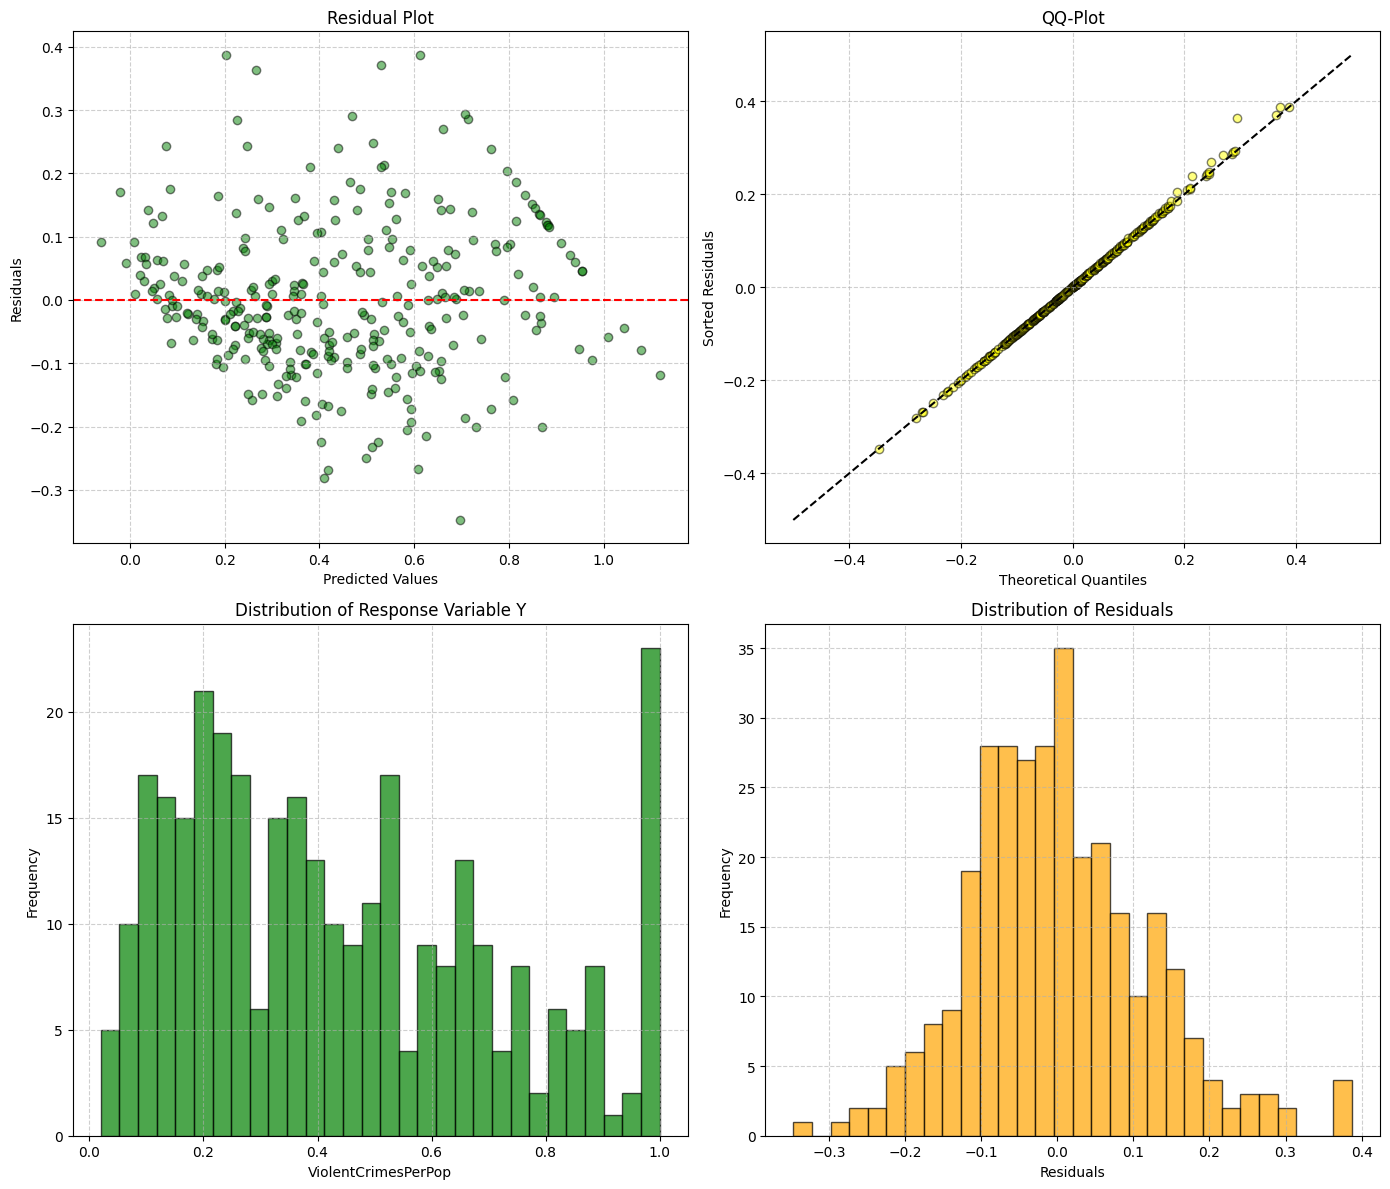

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Adding column names to the dataframe
df_columns = pd.read_csv('columns.csv', header=None)
columns = df_columns[0].to_list()

# Transforming the communities dataframe
df = pd.read_csv('communities.csv', header=None)
df = df.iloc[:, 5:]
df.columns = columns
df = df[~df.isin(['?']).any(axis=1)]
df = df.reset_index(drop=True)

# Creating X and y
target_column = columns[-1]
df_x = df.drop(columns=target_column).astype(float)
df_y = df[target_column].astype(float)
X = np.array(df_x).astype(float)
y = np.array(df_y).astype(float)

# Fitting a model
model = LinearRegression()
model.fit(X, y)

# Predicting
predicted_values = model.predict(X)

# Residuals
residuals = y - predicted_values

# QQ-plot
sorted_residuals = np.sort(residuals)
expected_quantiles = np.sort(np.random.normal(0, 1, len(residuals)))

percentiles = np.arange(0, 100, 100 / len(residuals))
theoretical_quantiles = np.percentile(residuals, percentiles)


fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0, 0].scatter(predicted_values, residuals, alpha=0.5, color='green', edgecolor='black')
axs[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=1.5)
axs[0, 0].set_title('Residual Plot')
axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

axs[0, 1].scatter(theoretical_quantiles, sorted_residuals, alpha=0.5, color='yellow', edgecolor='black')
axs[0, 1].plot([-0.5, 0.5], [-0.5, 0.5], color='black', linestyle='--', linewidth=1.5)
axs[0, 1].set_title('QQ-Plot')
axs[0, 1].set_xlabel('Theoretical Quantiles')
axs[0, 1].set_ylabel('Sorted Residuals')
axs[0, 1].grid(True, linestyle='--', alpha=0.6)

axs[1, 0].hist(y, bins=30, edgecolor='black', color='green', alpha=0.7)
axs[1, 0].set_title('Distribution of Response Variable Y')
axs[1, 0].set_xlabel('ViolentCrimesPerPop')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True, linestyle='--', alpha=0.6)

axs[1, 1].hist(residuals, bins=30, edgecolor='black', color='orange', alpha=0.7)
axs[1, 1].set_title('Distribution of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## Task 2

#### Subtask a) 

In [3]:
def include_main_effects(x):
    x = x.copy()
    num_cols = len(x.columns)
    
    for id1 in range(num_cols):
        for id2 in range(id1, num_cols):
            # Columns for pairing
            col1 = x.columns[id1]
            col2 = x.columns[id2]

            # Checking if the columns are not identical
            if not (x[col1] == x[col2]).all():
                x[f'{col1}&{col2}'] = x[col1] * x[col2]
    return x

In [4]:
X_interaction = include_main_effects(df_x)

C:\Users\Predrag\AppData\Local\Temp\ipykernel_2888\2277130690.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[f'{col1}&{col2}'] = x[col1] * x[col2]
C:\Users\Predrag\AppData\Local\Temp\ipykernel_2888\2277130690.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[f'{col1}&{col2}'] = x[col1] * x[col2]
C:\Users\Predrag\AppData\Local\Temp\ipykernel_2888\2277130690.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [5]:
print(f"Shape of the matrix is: {X_interaction.shape}.")

Shape of the matrix is: (319, 7503).


In [6]:
X_interaction

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicOperBudg&LemasPctPolicOnPatr,PolicOperBudg&LemasGangUnitDeploy,PolicOperBudg&LemasPctOfficDrugUn,PolicOperBudg&PolicBudgPerPop,LemasPctPolicOnPatr&LemasGangUnitDeploy,LemasPctPolicOnPatr&LemasPctOfficDrugUn,LemasPctPolicOnPatr&PolicBudgPerPop,LemasGangUnitDeploy&LemasPctOfficDrugUn,LemasGangUnitDeploy&PolicBudgPerPop,LemasPctOfficDrugUn&PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0360,0.020,0.0128,0.0056,0.450,0.2880,0.1260,0.16,0.070,0.0448
1,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0.0546,0.030,0.0528,0.0156,0.455,0.8008,0.2366,0.44,0.130,0.2288
2,0.25,0.54,0.05,0.71,0.48,0.30,0.42,0.48,0.28,0.32,...,0.0440,0.025,0.0380,0.0065,0.440,0.6688,0.1144,0.38,0.065,0.0988
3,1.00,0.42,0.47,0.59,0.12,0.05,0.41,0.53,0.34,0.33,...,0.2555,0.000,0.1085,0.0735,0.000,0.2263,0.1533,0.00,0.000,0.0651
4,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0.0081,0.010,0.0056,0.0009,0.810,0.4536,0.0729,0.56,0.090,0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1.00,0.29,0.21,0.29,1.00,0.26,0.24,0.47,0.28,0.46,...,0.3968,0.310,0.3968,0.2170,0.320,0.4096,0.2240,0.32,0.175,0.2240
315,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.0072,0.000,0.0062,0.0015,0.000,0.4464,0.1080,0.00,0.000,0.0930
316,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.0468,0.000,0.0546,0.0168,0.000,0.7098,0.2184,0.00,0.000,0.2548
317,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.0158,0.000,0.0044,0.0036,0.000,0.1738,0.1422,0.00,0.000,0.0396


#### Subtask b)

In [12]:
def forward_stepwise_selection(X, y, m):
    """
    Function for choosing m-best features from all possible features with forward stepwise selection.
    Arguments: X - all features, y - target feature, m - number of optimal features.
    """
    # Initializing the arrays for the features
    selected_features = []
    remaining_features = list(X.columns)

    # Defining the model
    model = LinearRegression()

    for _ in range(m):
        # Initializing the temporary variables for comparison
        best_mse = float('inf')
        best_feature = None

        for feature in remaining_features:
            # Generating a subset of features we want to measure MSE with
            features_to_try = selected_features + [feature]
            X_subset = X[features_to_try]

            # Fitting the model
            model.fit(X_subset, y)

            # Predicting
            y_pred = model.predict(X_subset)

            # Calculating MSE
            mse = mean_squared_error(y, y_pred)

            # Checking if we found an optimal feature
            if mse < best_mse:
                best_mse = mse
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

    return selected_features

# Here I add column names four our dataframe so we know which features are optimal
df_columns = pd.read_csv('columns.csv', header=None)
columns = df_columns[0].to_list()

# Again working with the dataframe
df = pd.read_csv('communities.csv', header=None)
df = df.iloc[:, 5:]
df.columns = columns
df = df[~df.isin(['?']).any(axis=1)]
df = df.reset_index(drop=True)

# Getting our X and y
target_column = columns[-1]
df_x = df.drop(columns=target_column).astype(float)
df_y = df[target_column].astype(float)

# Final results
selected_features = forward_stepwise_selection(df_x, df_y, m=10)
print("The best features selected with forward stepwise are:", selected_features)

The best features selected with forward stepwise are: ['PctKids2Par', 'NumStreet', 'racePctWhite', 'TotalPctDiv', 'PctEmplManu', 'pctWInvInc', 'LemasGangUnitDeploy', 'PolicReqPerOffic', 'LemasPctOfficDrugUn', 'OtherPerCap']


### Subtask c)

In [14]:
def forward_stepwise_selection_interaction_effects(x, y, m):
    # Initializing the arrays for storing features
    selected_features = []
    remaining_features = list(x.columns)
    best_mse = float('inf')

    # Constraining m
    if m > len(remaining_features):
        raise ValueError('m cannot be larger than the number of features')
    
    while len(selected_features) < m:
        mse_list = []

        for feature in remaining_features:
            current_features = selected_features + [feature]
            x_subset = x[current_features]

            # Fiting
            model = LinearRegression()
            model.fit(x_subset, y)

            # Predicting
            y_pred = model.predict(x_subset)
            mse = mean_squared_error(y, y_pred)
            mse_list.append((feature, mse))

        # Selecting the feature with the lowest MSE
        best_feature, _ = min(mse_list, key=lambda x: x[1])

        # Updateing selected features
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        if '&' in best_feature:
            first_main_effect, second_main_effect = best_feature.split('&')
            selected_features.append(first_main_effect)
            remaining_features.remove(first_main_effect)
            selected_features.append(second_main_effect)
            remaining_features.remove(second_main_effect)
            
    return selected_features

m = 5
selected_features = forward_stepwise_selection_interaction_effects(X_interaction, df_y, m)

print(f'The {len(selected_features)} most important features selected when selecting the corresponding main effects with the interaction '
      f'effect: {selected_features}')

The 6 most important features selected when selecting the corresponding main effects with the interaction effect: ['PctKids2Par&LemasSwFTFieldOps', 'PctKids2Par', 'LemasSwFTFieldOps', 'racepctblack&PctPersDenseHous', 'racepctblack', 'PctPersDenseHous']
